In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x +5

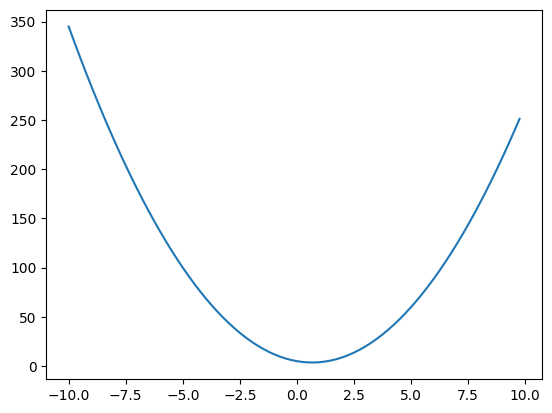

In [3]:
xs= np.arange(-10,10,0.25)
ys= f(xs)
plt.plot(xs,ys)


In [4]:
h = 0.001
x = 5.8
f(x)
y = (f(x+h)-f(x))/h
y


30.802999999991698

In [5]:
#understanding derivatives
h=0.0001
#inputs
a=2.0
b=-4.0
c=11.0

d1= a*b + c
a+=h
d2= a*b + c

print('d1',d1)
print('d2',d2)
print ('slope', (d2-d1)/h)


d1 3.0
d2 2.999599999999999
slope -4.000000000008441


In [6]:
class Value:
    def __init__(self,data, _children=(), _op='', label=''):    # _children tuple gives us a record of the previous values, essentially a way of tracking parents
        self.data=data
        self.grad=0.0
        self._prev= set(_children) # empty set initially
        self._op= _op
        self.label= label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        out= Value(self.data+other.data, (self,other), '+')
        return out
    def __mul__(self,other):
        out= Value(self.data*other.data, (self,other), '*')
        return out

    def tanh(self):
        import math
        x=self.data
        t= (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out= Value(t, (self,) , 'tanh')
        return out
    
a=Value(2.0, label='a')
b=Value(-4.0, label='b')
c=Value(11.0, label='c')
e=a*b; e.label='e'
d=e+c; d.label='d'
f= Value(2.0, label='f')
output= d*f; output.label='output'

d._prev
d._op
# we can't a+b as a and b are two 'Value' objects, so we have to custom define it

'+'

In [7]:
from graphviz import Digraph

def trace(root): #builds a set of all nodes and edges in a graph
    nodes,edges=set(),set()
    def build(v):
        
        if v in nodes: return
        nodes.add(v)
        for child in v._prev:
            edges.add((child,v))
            build(child)
    build(root)
    return nodes,edges

def draw_dot(root):
    
    dot= Digraph(format='svg', graph_attr={'rankdir':'LR'}) #LR is left to right
    nodes,edges= trace(root)
    for n in nodes:
        uid= str(id(n)) #for any value in graph, create a rectangular ('record') node for it
        dot.node(name=uid, label="{ %s | data %.4f | grad %.4f}" % (n.label,n.data,n.grad),shape='record')
        if n._op: #if the value is the result of some operation, create an op node for it
            dot.node(name=uid+ n._op, label=n._op) # and connect this node to it
            dot.edge(uid+ n._op, uid)

    for n1,n2 in edges: #connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2))+ n2._op)

    return dot



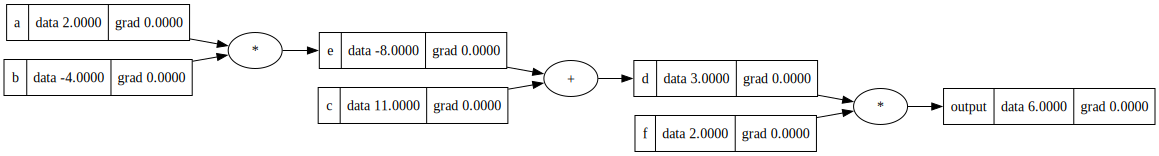

In [8]:
draw_dot(output)

In [9]:
a.data+=0.01 *a.grad
b.data+=0.01 *b.grad
c.data+=0.01 *c.grad
f.data+=0.01 *f.grad

e=a*b
d=e+c
output=d*f
print(output.data)

6.0


In [10]:
output=d*f


In [11]:
f.grad=3.0
d.grad=2.0
c.grad=2.0
e.grad=2.0
a.grad=8.0
b.grad=-4.0



In [12]:
def verify():
    h=0.001
    a=Value(2.0, label='a')
  
    b=Value(-4.0, label='b')
    c=Value(11.0, label='c')
    e=a*b; e.label='e'
    d=e+c; d.label='d'
    f= Value(2.0, label='f')
    output= d*f; output.label='output'
    out1=output.data
    
    a=Value(2.0, label='a')
    a.data+=h
    b=Value(-4.0, label='b')

    c=Value(11.0, label='c')
    e=a*b; e.label='e'
    d=e+c; d.label='d'
    f= Value(2.0, label='f')
    output= d*f; output.label='output'
    out2= output.data
    
    print((out1-out2)/h)

verify()

7.999999999999119


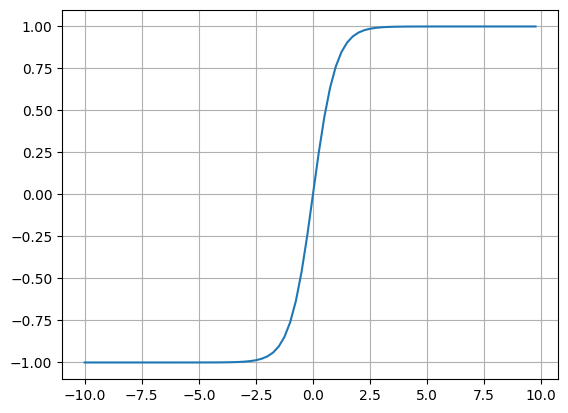

In [13]:
plt.plot(np.arange(-10,10,0.25), np.tanh(np.arange(-10,10,0.25)));
plt.grid();

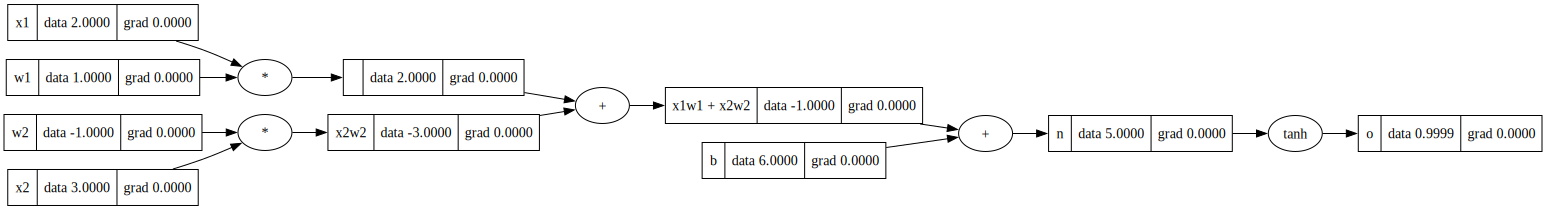

In [16]:

#inputs x1,x2
x1=Value(2.0, label='x1')
x2=Value(3.0, label='x2')

#weights w1,w2
w1=Value(1.0, label='w1')
w2=Value(-1.0, label='w2')

#bias of the neuron
b=Value(6.0, label='b')

#x1*w1 + x2*w2 + b
x1w1= x1*w1; x1w1.labe='x1w1'
x2w2= x2*w2; x2w2.label='x2w2'
x1w1_x2w2= x1w1+x2w2; x1w1_x2w2.label='x1w1 + x2w2'
n = x1w1_x2w2+b; n.label='n'
o = n.tanh(); o.label='o'
draw_dot(o)

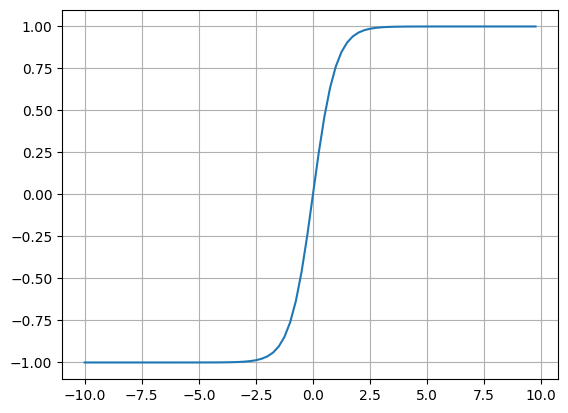

In [15]:
plt.plot(np.arange(-10,10,0.25), np.tanh(np.arange(-10,10,0.25))); plt.grid();